In [73]:
import pandas as pd
import numpy as np

In [74]:
data = pd.read_csv('vehicles_messy.csv')

C:\Users\Laura Rodríguez\AppData\Local\Temp\ipykernel_4656\1381342516.py:1: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('vehicles_messy.csv')


Analizamos el dataframe que tenemos

In [75]:
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [76]:
data.shape

(37843, 83)

Vamos a ver el nombre de las columnas de nuestro dataframe, sus tipos de datos y los valores None

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        37843 non-null  float64
 1   barrelsA08       37843 non-null  float64
 2   charge120        37843 non-null  float64
 3   charge240        37843 non-null  float64
 4   city08           37843 non-null  int64  
 5   city08U          37843 non-null  float64
 6   cityA08          37843 non-null  int64  
 7   cityA08U         37843 non-null  float64
 8   cityCD           37843 non-null  float64
 9   cityE            37843 non-null  float64
 10  cityUF           37843 non-null  float64
 11  co2              37843 non-null  int64  
 12  co2A             37843 non-null  int64  
 13  co2TailpipeAGpm  37843 non-null  float64
 14  co2TailpipeGpm   37843 non-null  float64
 15  comb08           37843 non-null  int64  
 16  comb08U          37843 non-null  float64
 17  combA08     

Creamos un df que cuenta los datos nulos de cada columna y filtramos aquellas columnas que tengan algún valor nulo

In [78]:
nan_cols = data.isna().sum()
nan_cols[nan_cols > 0]

cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

Vamos a borrar las columnas con más de 10000 valores nulos

In [79]:
data_original = data.copy() # Primero realizamos una copia de nuestros datos originales

In [80]:
data.drop(columns=nan_cols[nan_cols>1e4].index, inplace=True)
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1985,-1250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1985,-8500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,0.0,Subcompact Cars,1985,500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,0.0,Vans,1985,-8500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,0.0,Compact Cars,1993,-4000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


Nuevo df donde solo se muestra la fila donde 'displ' es null. Nos quedamos con las columnas que nos resulten má útiles.

In [81]:
bad_index = data.displ[data.displ.isna()].index
new_data = data.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']]
new_data.head()

,make,model,fuelType,cylinders,displ
7138,Nissan,Altra EV,Electricity,NaN,NaN
7139,Toyota,RAV4 EV,Electricity,NaN,NaN
8143,Toyota,RAV4 EV,Electricity,NaN,NaN
8144,Ford,Th!nk,Electricity,NaN,NaN
8146,Ford,Explorer USPS Electric,Electricity,NaN,NaN


Reemplazamos los valores NaN por lo que nos parezca más apropiado en nuestro dataset principal.
En nuestro caso, los motores eléctricos y rotativos no tienen cilindros.
Nos vale con sustituir nuestros valores NaN por 0.

In [82]:
data[['cylinders', 'displ']] = data[['cylinders', 'displ']].fillna(0)
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1985,-1250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1985,-8500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,0.0,Subcompact Cars,1985,500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,0.0,Vans,1985,-8500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,0.0,Compact Cars,1993,-4000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


Nos queda analizar los datos de las columnas drive y trany que también contienen datos NaN.

Comenzamos con la columna drive:

In [83]:
bad_index = data.drive[data.drive.isna()].index
new_data = data.iloc[bad_index][['make', 'model', 'fuelType', 'drive']]
new_data.head()

,make,model,fuelType,drive
7138,Nissan,Altra EV,Electricity,NaN
8144,Ford,Th!nk,Electricity,NaN
8147,Nissan,Hyper-Mini,Electricity,NaN
18217,Alfa Romeo,Spider Veloce 2000,Regular,NaN
18218,Bertone,X1/9,Regular,NaN


En este caso no podemos 'intuir' los datos como en el caso anterior que rellenamos los huecos con 0. Ahora tenemos que tomar la decisión de si borrar los datos NaN o si reemplazarlos con 'unknown'. 
Llegamos a la conclusión de que es mejor reemplazar los datos nulos con 'unknown', ya que de la otra manera perderíamos cerca de 1200 datos.  

In [84]:
data.drive.fillna('unknown', inplace=True)
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1985,-1250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1985,-8500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,0.0,Subcompact Cars,1985,500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,0.0,Vans,1985,-8500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,0.0,Compact Cars,1993,-4000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


Seguimos con la columna trany:

In [85]:
bad_index = data.trany[data.trany.isna()].index
new_data = data.iloc[bad_index][['make', 'model', 'fuelType', 'trany']]
new_data.head()

,make,model,fuelType,trany
7138,Nissan,Altra EV,Electricity,NaN
7139,Toyota,RAV4 EV,Electricity,NaN
8143,Toyota,RAV4 EV,Electricity,NaN
8144,Ford,Th!nk,Electricity,NaN
8146,Ford,Explorer USPS Electric,Electricity,NaN


De nuevo, no podemos intuir los datos de la columna trany ni tampoco eliminarlos debido a su cantidad. Por ello, los reemplazamos por 'unknown'.

In [86]:
data.trany.fillna('unknown', inplace=True)
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1985,-1250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1985,-8500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,0.0,Subcompact Cars,1985,500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,0.0,Vans,1985,-8500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,0.0,Compact Cars,1993,-4000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


El siguiente paso es analizar si alguno de nuestros datos es incorrecto.
Hemos definido que aquellos vehículos sin 'cylinders' tampoco tienen 'display'.

In [87]:
for i in range(len(data)):
    if data.iloc[i]['cylinders'] != 0 and data.iloc[i]['displ'] == 0:
        error = data.iloc[i][['make', 'model', 'cylinders', 'displ']]
    elif data.iloc[i]['cylinders'] == 0 and data.iloc[i]['displ'] != 0:
        error = data.iloc[i][['make', 'model', 'cylinders', 'displ']]

error

make         Mazda
model         RX-7
cylinders      0.0
displ          1.3
Name: 21506, dtype: object

Podemos observar que hay un dato cuyo 'cylinders' es 0 y, sin embargo, su 'displ' es distinto de 0. Ese es el dato incorrecto que buscamos.

Vamos a buscar vehículos similares a este en nuestro dataset para ver cuál es el error.

In [88]:
i = data.loc[data['make'] == 'Mazda'] # Primero filtramos la marca
ii = i.loc[i['model'] == 'RX-7'].index # Luego filtramos el modelo
data.iloc[ii][['make', 'model', 'cylinders', 'displ']].head() 

,make,model,cylinders,displ
714,Mazda,RX-7,2.0,1.3
715,Mazda,RX-7,2.0,1.3
1785,Mazda,RX-7,2.0,1.3
1786,Mazda,RX-7,2.0,1.3
1946,Mazda,RX-7,2.0,1.1


Podemos observar que para el vehículo Mazda RX-7 'cylinders' equivale a 2.0 y 'displ' equivale a 1.3.
Observando estos datos, llegamos a la conclusion que en nuestro dato incorrecto debemos sustituir 'cylinders' por 2.0.

In [89]:
data['cylinders'] = data.loc[(data['cylinders'] == '0.0') & (data['make'] == 'Mazda') & (data['model'] == 'RX-7'), 'cylinders'] = '2.0'

for i in range(len(data)):
    if data.iloc[i]['cylinders'] != 0 and data.iloc[i]['displ'] == 0:
        error = data.iloc[i][['make', 'model', 'cylinders', 'displ']]
    elif data.iloc[i]['cylinders'] == 0 and data.iloc[i]['displ'] != 0:
        error = data.iloc[i][['make', 'model', 'cylinders', 'displ']]

error

make                     Tesla
model        Model X AWD - 60D
cylinders                  2.0
displ                      0.0
Name: 30975, dtype: object

Tenemos un nuevo error. Vamos a solucionarlo como el anterior.

In [90]:
i = data.loc[data['make'] == 'Tesla'] # Primero filtramos la marca
ii = i.loc[i['model'] == 'Model X AWD - 60D'].index # Luego filtramos el modelo
data.iloc[ii][['make', 'model', 'cylinders', 'displ']].head() 

,make,model,cylinders,displ
30975,Tesla,Model X AWD - 60D,2.0,0.0


Observamos que al no tener otros datos con los que comparar, no podemos hacer nada.

El siguiente paso es identificar las columnas con baja varianza.

In [91]:
low_var = []

for c in data._get_numeric_data():
    p = data[c][(len(data[c])*90)//100]
    m = data[c].min()
    if p == m: 
        low_var.append(c)
        
low_var

['barrelsA08',
 'charge120',
 'charge240',
 'city08U',
 'cityA08',
 'cityA08U',
 'cityCD',
 'cityE',
 'cityUF',
 'co2',
 'co2A',
 'co2TailpipeAGpm',
 'comb08U',
 'combA08',
 'combA08U',
 'combE',
 'combinedCD',
 'combinedUF',
 'feScore',
 'fuelCostA08',
 'ghgScore',
 'ghgScoreA',
 'highway08U',
 'highwayA08',
 'highwayA08U',
 'highwayCD',
 'highwayE',
 'highwayUF',
 'hlv',
 'hpv',
 'lv4',
 'phevBlended',
 'pv4',
 'range',
 'rangeCity',
 'rangeCityA',
 'rangeHwy',
 'rangeHwyA',
 'UCityA',
 'UHighwayA',
 'charge240b',
 'phevCity',
 'phevHwy',
 'phevComb']

Eliminamos aquellas columnas que me aporten poca información (las de la lista low_var).

In [92]:
data.drop(columns=low_var, inplace=True)

Ahora seguimos con el estudio de los cuartiles y los outliers.

In [93]:
stats = data.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143,6.269755
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000,5.000000
co2TailpipeGpm,37843.0,473.179736,122.188847,0.00,388.00000,467.736842,555.437500,1269.571429,167.437500
comb08,37843.0,20.195809,6.623444,7.00,17.00000,19.000000,23.000000,124.000000,6.000000
displ,37843.0,3.307658,1.371982,0.00,2.20000,3.000000,4.300000,8.400000,2.100000
engId,37843.0,8860.308961,17829.683477,0.00,0.00000,211.000000,4505.000000,69102.000000,4505.000000
fuelCost08,37843.0,1882.060090,510.280408,550.00,1500.00000,1850.000000,2200.000000,5800.000000,700.000000
highway08,37843.0,24.104881,6.963192,9.00,20.00000,24.000000,27.000000,111.000000,7.000000
id,37843.0,19019.286235,11034.784855,1.00,9461.50000,18923.000000,28570.500000,38173.000000,19109.000000
lv2,37843.0,1.849219,4.429983,0.00,0.00000,0.000000,0.000000,41.000000,0.000000


In [94]:
outliers = pd.DataFrame(columns=data.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = data[(data[col] < lower) | 
                   (data[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
    

outliers.head()

C:\Users\Laura Rodríguez\AppData\Local\Temp\ipykernel_4656\1430146486.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\Laura Rodríguez\AppData\Local\Temp\ipykernel_4656\1430146486.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\Laura Rodríguez\AppData\Local\Temp\ipykernel_4656\1430146486.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\Laura Rodríguez\AppData\Local\Temp\ipykernel_4656\1430146486.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users

,barrels08,city08,co2TailpipeGpm,comb08,cylinders,displ,drive,engId,fuelCost08,fuelType,...,pv2,trany,UCity,UHighway,VClass,year,youSaveSpend,createdOn,modifiedOn,Outlier
47,32.961,9,888.7,10,2.0,5.9,Rear-Wheel Drive,2890,3350,Regular,...,0,Automatic 3-spd,11.0,15.0,Vans,1985,-10000,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,barrels08
58,32.961,10,888.7,10,2.0,5.2,Rear-Wheel Drive,2854,3350,Regular,...,0,Automatic 3-spd,12.0,15.0,Vans,1985,-10000,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,barrels08
69,32.961,10,888.7,10,2.0,5.2,Rear-Wheel Drive,2850,3350,Regular,...,0,Automatic 3-spd,12.0,15.0,Vans,1985,-10000,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,barrels08
80,32.961,9,888.7,10,2.0,5.9,Rear-Wheel Drive,2890,3350,Regular,...,0,Automatic 3-spd,11.0,14.0,Vans,1985,-10000,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,barrels08
275,32.961,9,888.7,10,2.0,7.4,Rear-Wheel Drive,4880,3350,Regular,...,0,Automatic 4-spd,11.0,16.0,Standard Pickup Trucks,1993,-10000,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,barrels08


<AxesSubplot:>

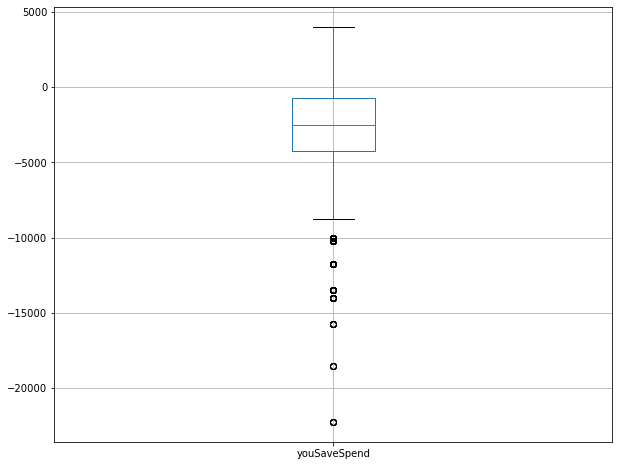

In [95]:
data[['youSaveSpend']].boxplot(figsize=(10,8))

Podemos observar que los outliers deberían eliminarse.

<AxesSubplot:>

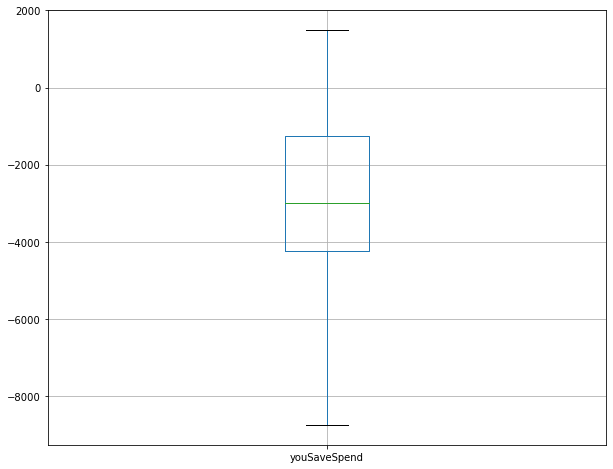

In [96]:
clean_index = [i for i in data.index if i not in outliers.index]
data = data.iloc[clean_index]
data[['youSaveSpend']].boxplot(figsize=(10,8))